In [1]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. 피클 파일에서 Series 불러오기
with open('data/okt.pkl', 'rb') as f:
    normalized = pickle.load(f)

# 2. 불용어 읽어오기
stopwords_file_path = 'stopwords_dh_last.txt'
stopwords = []
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    stopwords = [line.strip() for line in file.readlines()]

# 3. 불용어 제거 및 LDA 적용
def remove_stopwords(text):
    tokens = text.split()  # 공백으로 나누기
    filtered_tokens = [word for word in tokens if word not in stopwords]  # 불용어 제거
    return ' '.join(filtered_tokens)  # 다시 문자열로 결합

normalized_cleaned = [remove_stopwords(' '.join([word for word in text.split() if word not in stopwords])
) for text in normalized]

# 4. TF-IDF 벡터라이저 적용
vectorizer = TfidfVectorizer(max_features=10000)
tfidf_matrix = vectorizer.fit_transform(normalized_cleaned)

클러스터 수: 1


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


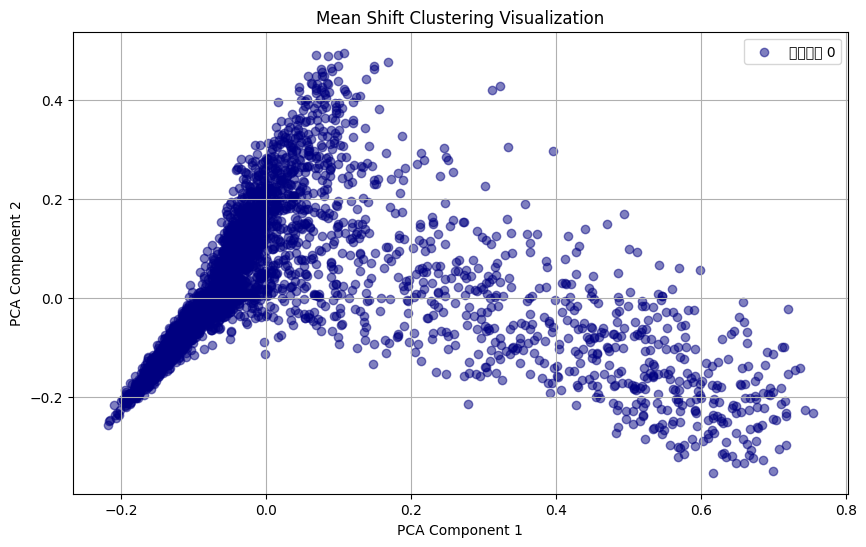

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

# TF-IDF 행렬 정규화
normalizer = Normalizer()
tfidf_normalized = normalizer.fit_transform(tfidf_matrix)

# Mean Shift 클러스터링
mean_shift = MeanShift()
clusters = mean_shift.fit_predict(tfidf_normalized.toarray())

# PCA로 2D로 차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_normalized.toarray())

# 클러스터 수 확인
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # -1은 노이즈 포인트를 의미
print(f'클러스터 수: {num_clusters}')

# 클러스터별 색상 설정
unique_clusters = set(clusters)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_clusters)))

# Mean Shift 결과 시각화
plt.figure(figsize=(10, 6))

for cluster in unique_clusters:
    color = colors[cluster % len(colors)] if cluster != -1 else 'black'
    plt.scatter(pca_result[clusters == cluster, 0], pca_result[clusters == cluster, 1],
                color=color, label=f'클러스터 {cluster}' if cluster != -1 else '노이즈', alpha=0.5)

plt.title('Mean Shift Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()